In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [2]:
df = pd.read_csv('ALYSSASDATA_all_data_using_ffmaps_central50slices_cropped.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,subject,side,gmed_fat_frac,gmin_fat_frac,tfl_fat_frac,gmed_avg_area_pixels,gmin_avg_area_pixels,tfl_avg_area_pixels,gmed_total_area_pixels,gmin_total_area_pixels,tfl_total_area_pixels,gmed_avg_lean_area,gmin_avg_lean_area,tfl_avg_lean_area,redcap_event_name,mri_date,age,gender,bmi,kl_score,height_m,weight_kg,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_abd_norm,hoos_pain_score,hoos_symptoms_score,hoos_adl_score,hoos_qol_score,hoos_sports_score,t1rho_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_fem_whole_cartilage,t2_mean_ace_whole_cartilage,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,Sagittal_AA_AcetabulumAnterior_Baseline__baseline_arm_1__shoamr,Sagittal_AP_AcetabulumPosterior_Baseline__baseline_arm_1__shoam,Sagittal_FA_FemurAnterior_Baseline__baseline_arm_1__shoamri_sc_,Sagittal_FP_FemurPosterior_Baseline__baseline_arm_1__shoamri_sc,Coronal_ASL_AcetabulumSuperiorLateral_Baseline__baseline_arm_1_,Coronal_FSL_FemurSuperiorLateral_Baseline__baseline_arm_1__shoa,Coronal_FIM_FemurInferiorMedial_Baseline__baseline_arm_1__shoam,fem_ap,ace_ap,fem_sl_mi,ace_sl_p,task,peak_hip_flex,peak_hip_ext,peak_hip_add,peak_hip_abd,peak_hip_int_rot,peak_hip_ext_rot,peak_hip_flex_moment,peak_hip_ext_moment,peak_hip_add_moment,hip_flex_moment_impulse,hip_ext_moment_impulse,hip_add_moment_impulse,peak_hip_ext_rot_moment,peak_knee_flex_stance1,knee_sag_excur,peak_knee_excur_mid,knee_flex_init_cont,peak_knee_add,peak_knee_abd,peak_knee_int_rot,peak_knee_ext_rot,peak_knee_flex_mom_stance1,peak_knee_flex_mom_stance2,knee_flex_mom_imp_stance1,knee_flex_mom_imp_stance2,peak_knee_ext_mom_stance1,peak_knee_ext_mom_stance2,knee_ext_mom_imp_stance1,knee_ext_mom_imp_stance2,peak_KAM1,peak_KAM2,KAM1_imp,KAM2_imp,peal_int_rot_mom,peak_ext_rot_mom
0,P001,R,0.073225,0.079571,0.040599,6658.045455,1774.272727,355.863636,146477,39034,7829,6160.290842,1790.693158,571.180659,2_yr_follow_up_arm_1,2018-12-11,67,1,29.95,3,1.78,94.90,17,19.10,9.80,11.00,0.07,92.5,90,85.29,81.25,68.75,37.646445,40.766230,36.157157,33.064145,15,6,1,0,8,2,0,0,0,2,1,0,0,2,1,2,fixedwalk,24.337619,-17.248045,7.869092,-1.670302,-0.217082,-10.655841,0.598459,-0.608711,0.942738,33.624610,128.314349,385.294180,-0.188721,-17.311801,21.307423,1.257478,3.995622,3.963099,-3.686470,-2.904318,-11.112038,-0.691543,-0.112554,118.417041,94.542917,0.309628,0.436194,73.530362,89.737659,0.458200,0.193381,82.303838,67.510248,0.171131,-0.144348
1,P002,L,0.044873,0.083365,0.023477,4909.150000,1876.050000,325.750000,98183,37521,6515,4648.643265,1794.971462,623.215524,1_yr_follow_up_arm_1,2018-01-08,61,2,20.15,1,1.75,61.70,24,14.80,8.10,82.00,0.24,100.0,100,100.00,100.00,100.00,36.657249,33.824551,36.424032,29.293341,9,2,0,0,7,1,0,0,0,0,1,0,0,1,1,0,fixedwalk,23.299599,-12.065013,9.884836,0.858321,7.213577,-3.830758,0.907565,-0.460672,0.900731,116.021513,70.092246,322.097890,-0.080111,-21.058017,20.286712,-7.579560,-0.771304,-2.515092,-8.041260,2.564030,-10.868722,-0.680079,-0.194916,103.442737,71.648220,0.397164,0.224214,55.772162,74.065982,0.274841,0.093149,46.750894,35.731397,0.067961,-0.170724
2,P006,L,0.038408,0.049585,0.023053,6760.300000,1908.650000,808.450000,135206,38173,16169,6447.843302,1893.001839,1301.906733,2_yr_follow_up_arm_1,2018-10-25,58,1,22.60,3,1.66,62.27,32,14.20,7.80,131.70,0.14,97.5,100,100.00,75.00,93.75,35.589170,37.120420,35.589170,37.120420,6,2,0,0,4,0,0,0,0,1,1,0,0,0,1,1,fixedwalk,29.008134,-16.359135,6.846979,-2.151014,4.635262,-7.328857,0.886539,-0.294199,0.976388,196.259933,54.547582,365.445225,-0.142729,-20.468787,14.502409,-6.869086,-5.966378,5.432058,-1.325099,-1.351552,-9.108187,-0.462535,-0.094185,60.069292,39.854672,0.288867,0.496982,30.938539,50.983589,0.596807,0.508538,119.467869,113.100279,0.058018,-0.213483
3,P007,R,0.069513,0.095753,0.040587,4281.409091,1403.636364,266.954545,94191,30880,5873,3956.609632,1386.232581,464.690684,2_yr_follow_up_arm_1,2018-11-26,67,2,20.47,3,1.76,63.40,12,19.16,10.54,10.27,0.

In [4]:
len(list(df.columns))

88

In [5]:
df.isna().sum()

subject                                                            0
side                                                               0
gmed_fat_frac                                                      0
gmin_fat_frac                                                      0
tfl_fat_frac                                                       0
gmed_avg_area_pixels                                               0
gmin_avg_area_pixels                                               0
tfl_avg_area_pixels                                                0
gmed_total_area_pixels                                             0
gmin_total_area_pixels                                             0
tfl_total_area_pixels                                              0
gmed_avg_lean_area                                                 0
gmin_avg_lean_area                                                 0
tfl_avg_lean_area                                                  0
redcap_event_name                 

In [6]:
df.dropna(inplace=True)
#to get rid of some columns w/ NA df = df.dropna(subset=['colA', 'colC']) 
df.describe()

,gmed_fat_frac,gmin_fat_frac,tfl_fat_frac,gmed_avg_area_pixels,gmin_avg_area_pixels,tfl_avg_area_pixels,gmed_total_area_pixels,gmin_total_area_pixels,tfl_total_area_pixels,gmed_avg_lean_area,gmin_avg_lean_area,tfl_avg_lean_area,age,gender,bmi,kl_score,height_m,weight_kg,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_abd_norm,hoos_pain_score,hoos_symptoms_score,hoos_adl_score,hoos_qol_score,hoos_sports_score,t1rho_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_fem_whole_cartilage,t2_mean_ace_whole_cartilage,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,Sagittal_AA_AcetabulumAnterior_Baseline__baseline_arm_1__shoamr,Sagittal_AP_AcetabulumPosterior_Baseline__baseline_arm_1__shoam,Sagittal_FA_FemurAnterior_Baseline__baseline_arm_1__shoamri_sc_,Sagittal_FP_FemurPosterior_Baseline__baseline_arm_1__shoamri_sc,Coronal_ASL_AcetabulumSuperiorLateral_Baseline__baseline_arm_1_,Coronal_FSL_FemurSuperiorLateral_Baseline__baseline_arm_1__shoa,Coronal_FIM_FemurInferiorMedial_Baseline__baseline_arm_1__shoam,fem_ap,ace_ap,fem_sl_mi,ace_sl_p,peak_hip_flex,peak_hip_ext,peak_hip_add,peak_hip_abd,peak_hip_int_rot,peak_hip_ext_rot,peak_hip_flex_moment,peak_hip_ext_moment,peak_hip_add_moment,hip_flex_moment_impulse,hip_ext_moment_impulse,hip_add_moment_impulse,peak_hip_ext_rot_moment,peak_knee_flex_stance1,knee_sag_excur,peak_knee_excur_mid,knee_flex_init_cont,peak_knee_add,peak_knee_abd,peak_knee_int_rot,peak_knee_ext_rot,peak_knee_flex_mom_stance1,peak_knee_flex_mom_stance2,knee_flex_mom_imp_stance1,knee_flex_mom_imp_stance2,peak_knee_ext_mom_stance1,peak_knee_ext_mom_stance2,knee_ext_mom_imp_stance1,knee_ext_mom_imp_stance2,peak_KAM1,peak_KAM2,KAM1_imp,KAM2_imp,peal_int_rot_mom,peak_ext_rot_mom
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.057774,0.088112,0.055811,5035.419495,1665.439655,433.022401,104767.913793,34445.827586,8966.206897,4716.312164,1647.869906,690.826786,50.948276,1.586207,23.858103,1.431034,1.673879,67.232759,22.293103,19.334483,9.730345,75.585517,0.218103,88.362069,86.982759,92.114655,78.771552,84.698276,36.893112,38.119655,34.375472,34.335485,12.517241,3.206897,0.603448,0.568966,7.827586,0.344828,0.086207,0.0,0.034483,0.775862,0.568966,0.189655,-0.034483,0.258621,0.379310,0.689655,24.673532,-14.808615,7.105499,-2.079919,6.153484,-5.526712,0.921705,-0.665704,0.929935,75.211303,127.675736,343.178540,-0.142510,-17.061916,16.764096,-3.530371,-0.297820,2.437335,-3.329494,-0.595105,-13.085405,-0.569507,-0.176294,85.862131,57.463421,0.437149,0.303526,42.386265,58.481043,0.482251,0.286916,88.730839,75.627089,0.119606,-0.152470
std,0.018915,0.038884,0.048022,1039.942675,370.093075,143.269312,25318.741636,7968.441293,3084.545033,992.733919,359.178114,217.213993,15.634445,0.496814,3.268158,1.044821,0.089301,13.138801,6.828754,2.787930,2.201972,45.339228,0.088723,14.923428,14.836526,13.378421,21.774980,20.317262,3.635941,3.897979,4.393482,4.647425,8.184798,3.116220,1.241669,1.299285,4.503947,0.578920,0.339478,0.0,0.262613,0.701955,0.624417,0.511513,0.262613,0.689784,0.670888,0.754097,4.920888,5.194432,2.596791,2.218763,4.539856,3.808422,0.176710,0.151164,0.124372,45.293477,40.921460,61.146576,0.06244

In [7]:
y = df['kl_score']

In [8]:
df.drop(['fem_ap', 'fem_sl_mi', 'ace_ap', 'ace_sl_p', 'age'], axis=1, inplace=True)

In [9]:
df.drop(['kl_score', 'subject', 'mri_date', 'redcap_event_name', 'task', 'side'], axis=1, inplace=True) #drop nonnumerical columns and output column

In [10]:
#run rf classifier base model on full dataset
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=None,
    min_samples_split=2, random_state=0, max_features = 9)
clf.fit(df, y)

ExtraTreesClassifier(max_features=9, n_estimators=1000, random_state=0)

In [11]:
#examine feature importance
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': clf.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
39,Coronal_ASL_AcetabulumSuperiorLateral_Baseline...,0.047343
62,peak_knee_ext_rot,0.025652
31,shoamri_car_score,0.025284
27,t1rho_mean_ace_whole_cartilage,0.021813
16,char_rise,0.021258
40,Coronal_FSL_FemurSuperiorLateral_Baseline__bas...,0.020150
29,t2_mean_ace_whole_cartilage,0.020130
60,peak_knee_abd,0.020119
43,peak_hip_ext,0.018654
1,gmin_fat_frac,0.017886


In [12]:
#examine cross validation score
scores = cross_val_score(clf, df, y, cv=5)
scores.mean()

0.5363636363636364

In [13]:
# Split up training and testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df, y, 
                                                                            test_size = 0.25, random_state = 42)

In [14]:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [15]:
#Create a random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [16]:
rf = ExtraTreesClassifier() 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)


rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [17]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [18]:
#evaluate accuracy of base model using .score 
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.4

In [19]:
#evaluate accuracy of model using accuracy_score 
y_pred_test_bm= base_model.predict(test_features)
accuracy_score(test_labels, y_pred_test_bm)

0.4

In [20]:
#evaluation accuracy of best model from random grid search
best_random = rf_random.best_estimator_
best_random.score(test_features, test_labels)

0.4

In [21]:
#evaluate accuracy of model using accuracy_score 
y_pred_test= best_random.predict(test_features)
accuracy_score(test_labels, y_pred_test)

0.4

In [22]:
#code to confirm accuracy scores
test = pd.DataFrame({'testlabels':test_labels, 'y_pred':y_pred_test, 'y_pred_test_bm': y_pred_test_bm})
test['true_y_bm'] = np.where(test.y_pred_test_bm != test.testlabels, 0, 1)
test

,testlabels,y_pred,y_pred_test_bm,true_y_bm
0,3,2,2,0
5,1,1,1,1
36,2,1,1,0
13,3,1,2,0
46,1,2,1,1
54,3,1,1,0
39,2,2,1,0
26,0,0,0,1
48,1,1,1,1
12,0,1,1,0


In [23]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
27,t1rho_mean_ace_whole_cartilage,0.028473
39,Coronal_ASL_AcetabulumSuperiorLateral_Baseline...,0.027569
1,gmin_fat_frac,0.021555
30,shoamri_total,0.021246
40,Coronal_FSL_FemurSuperiorLateral_Baseline__bas...,0.020361
54,peak_hip_ext_rot_moment,0.020314
64,peak_knee_flex_mom_stance2,0.019390
12,gender,0.018512
62,peak_knee_ext_rot,0.018244
29,t2_mean_ace_whole_cartilage,0.018167


In [24]:
#Repeat process but with KL as a binary outcome
kl_score_binary = np.where(y!=0, 1, 0)

In [25]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [30]:
rf_random2=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)


rf_random2.fit(train_features, train_labels);

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [31]:
rf_random2.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [32]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.9333333333333333

In [33]:
#evaluation accuracy of best model from random grid search
best_random = rf_random2.best_estimator_
best_random.score(test_features, test_labels)

0.8666666666666667

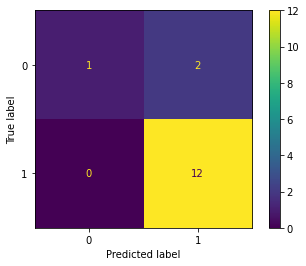

In [34]:
y_pred_test = rf_random2.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test, labels=rf_random2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random2.classes_)
disp.plot()
plt.show()

In [35]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
39,Coronal_ASL_AcetabulumSuperiorLateral_Baseline...,0.071906
31,shoamri_car_score,0.044407
1,gmin_fat_frac,0.037514
59,peak_knee_add,0.032806
60,peak_knee_abd,0.031448
16,char_rise,0.031049
42,peak_hip_flex,0.029211
17,m_walk_test,0.026794
71,peak_KAM1,0.023064
61,peak_knee_int_rot,0.022643


In [36]:
#drop cartilage relaxation times, shoamri scores, etc
df_reduced = df.drop(['t1rho_mean_fem_whole_cartilage', 't1rho_mean_ace_whole_cartilage',
       't2_mean_fem_whole_cartilage', 't2_mean_ace_whole_cartilage',
       'shoamri_total', 'shoamri_car_score', 'shoamri_bme_score',
       'shoamri_sc_score', 'shoamri_lab_score',
       'Sagittal_AA_AcetabulumAnterior_Baseline__baseline_arm_1__shoamr',
       'Sagittal_AP_AcetabulumPosterior_Baseline__baseline_arm_1__shoam',
       'Sagittal_FA_FemurAnterior_Baseline__baseline_arm_1__shoamri_sc_',
       'Sagittal_FP_FemurPosterior_Baseline__baseline_arm_1__shoamri_sc',
       'Coronal_ASL_AcetabulumSuperiorLateral_Baseline__baseline_arm_1_',
       'Coronal_FSL_FemurSuperiorLateral_Baseline__baseline_arm_1__shoa',
       'Coronal_FIM_FemurInferiorMedial_Baseline__baseline_arm_1__shoam'], axis=1)

In [37]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_reduced, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [38]:
rf = ExtraTreesClassifier() 
rf_random3 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)
rf_random3.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [39]:
rf_random3.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [40]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.8

In [41]:
#evaluation accuracy of best model from random grid search
best_random = rf_random3.best_estimator_
best_random.score(test_features, test_labels)

0.8

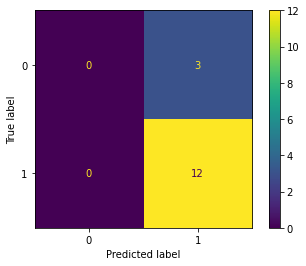

In [42]:
y_pred_test = rf_random3.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test, labels=rf_random3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random3.classes_)
disp.plot()
plt.show()

In [43]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df_reduced.columns,
                          'importance': base_model.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
16,char_rise,0.072080
20,st_hip_abd_norm,0.055495
43,peak_knee_add,0.055348
28,peak_hip_add,0.055011
44,peak_knee_abd,0.041368
56,peak_KAM2,0.038601
24,hoos_qol_score,0.033675
17,m_walk_test,0.031954
49,knee_flex_mom_imp_stance1,0.031150
47,peak_knee_flex_mom_stance1,0.030531


In [ ]:
#model without KL 1 scores
#df = pd.read_csv('ALYSSASDATA_all_data_using_ffmaps_central50slices_cropped.csv')
#df.dropna(inplace=True)
#df_filtered = df[df['kl_score'] != 1]
#y = df_filtered['kl_score']
#df_filtered.drop(['kl_score', 'subject', 'mri_date', 'redcap_event_name', 'task', 'side'], axis=1, inplace=True) #drop nonnumerical columns


In [ ]:
#kl_score_binary = np.where(y!=0, 1, 0)

In [44]:
#model w/out fat fraction
df = pd.read_csv('ALYSSASDATA_all_data_using_ffmaps_central50slices_cropped.csv')
df.dropna(inplace=True)
df_reduced2 = df.drop(['gmed_fat_frac', 'gmin_fat_frac', 'tfl_fat_frac',
       'gmed_avg_area_pixels', 'gmin_avg_area_pixels', 'tfl_avg_area_pixels',
       'gmed_total_area_pixels', 'gmin_total_area_pixels',
       'tfl_total_area_pixels', 'gmed_avg_lean_area', 'gmin_avg_lean_area',
       'tfl_avg_lean_area'], axis=1)
df_reduced2.drop(['fem_ap', 'fem_sl_mi', 'ace_ap', 'ace_sl_p', 'age'], axis=1, inplace=True)
y = df['kl_score']
kl_score_binary = np.where(y!=0, 1, 0)

df_reduced2.drop(['kl_score', 'subject', 'mri_date', 'redcap_event_name', 'task', 'side'], axis=1, inplace=True) #drop nonnumerical columns

In [45]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_reduced2, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [46]:
rf = ExtraTreesClassifier() 
rf_random5 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)

In [47]:
rf_random5.fit(train_features, train_labels);
rf_random5.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [48]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

1.0

In [49]:
y_pred_test_bm= base_model.predict(test_features)
accuracy_score(test_labels, y_pred_test_bm)

1.0

In [50]:
#evaluation accuracy of best model from random grid search
best_random = rf_random5.best_estimator_
rf_random5.score(test_features, test_labels)

0.8

In [51]:
y_pred_test = rf_random5.predict(test_features)
accuracy_score(test_labels, y_pred_test)

0.8

In [53]:
print(classification_report(test_labels, y_pred_test_bm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



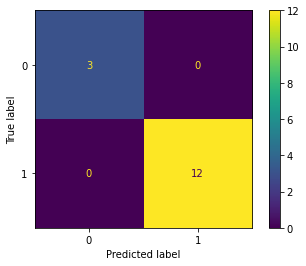

In [54]:
y_pred_test = rf_random5.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test_bm, labels=rf_random5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random5.classes_)
disp.plot()
plt.show()

In [55]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df_reduced2.columns,
                          'importance': base_model.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
27,Coronal_ASL_AcetabulumSuperiorLateral_Baseline...,0.074065
48,peak_knee_abd,0.065850
7,side_plank,0.057761
23,Sagittal_AA_AcetabulumAnterior_Baseline__basel...,0.036350
11,hoos_adl_score,0.035153
19,shoamri_car_score,0.032277
36,peak_hip_flex_moment,0.031874
62,KAM2_imp,0.031025
50,peak_knee_ext_rot,0.029510
2,height_m,0.029273


In [56]:
#drop cartilage relaxation times, shoamri scores, etc
df_reduced3 = df_reduced2.drop(['t1rho_mean_fem_whole_cartilage', 't1rho_mean_ace_whole_cartilage',
       't2_mean_fem_whole_cartilage', 't2_mean_ace_whole_cartilage',
       'shoamri_total', 'shoamri_car_score', 'shoamri_bme_score',
       'shoamri_sc_score', 'shoamri_lab_score',
       'Sagittal_AA_AcetabulumAnterior_Baseline__baseline_arm_1__shoamr',
       'Sagittal_AP_AcetabulumPosterior_Baseline__baseline_arm_1__shoam',
       'Sagittal_FA_FemurAnterior_Baseline__baseline_arm_1__shoamri_sc_',
       'Sagittal_FP_FemurPosterior_Baseline__baseline_arm_1__shoamri_sc',
       'Coronal_ASL_AcetabulumSuperiorLateral_Baseline__baseline_arm_1_',
       'Coronal_FSL_FemurSuperiorLateral_Baseline__baseline_arm_1__shoa',
       'Coronal_FIM_FemurInferiorMedial_Baseline__baseline_arm_1__shoam'], axis=1)

In [57]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_reduced3, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [58]:
rf = ExtraTreesClassifier() 
rf_random6 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)
rf_random6.fit(train_features, train_labels);
rf_random6.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [59]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.7333333333333333

In [60]:
#evaluation accuracy of best model from random grid search
best_random = rf_random6.best_estimator_
rf_random6.score(test_features, test_labels)

0.8

In [61]:
y_pred_test = rf_random6.predict(test_features)
print(classification_report(test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


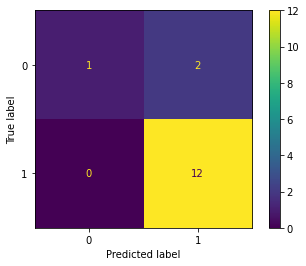

In [101]:
y_pred_test = rf_random6.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test, labels=rf_random6.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random6.classes_)
disp.plot()
plt.show()

In [62]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df_reduced3.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
32,peak_knee_abd,0.083486
4,char_rise,0.073613
5,m_walk_test,0.044359
33,peak_knee_int_rot,0.042454
31,peak_knee_add,0.040340
14,peak_hip_flex,0.034954
43,peak_KAM1,0.031663
28,knee_sag_excur,0.029075
0,gender,0.027749
6,stair_climbing,0.027075


In [63]:
#drop SHOMRI
df_reduced4 = df_reduced2.drop(['shoamri_total', 'shoamri_car_score', 'shoamri_bme_score',
       'shoamri_sc_score', 'shoamri_lab_score',
       'Sagittal_AA_AcetabulumAnterior_Baseline__baseline_arm_1__shoamr',
       'Sagittal_AP_AcetabulumPosterior_Baseline__baseline_arm_1__shoam',
       'Sagittal_FA_FemurAnterior_Baseline__baseline_arm_1__shoamri_sc_',
       'Sagittal_FP_FemurPosterior_Baseline__baseline_arm_1__shoamri_sc',
       'Coronal_ASL_AcetabulumSuperiorLateral_Baseline__baseline_arm_1_',
       'Coronal_FSL_FemurSuperiorLateral_Baseline__baseline_arm_1__shoa',
       'Coronal_FIM_FemurInferiorMedial_Baseline__baseline_arm_1__shoam'], axis=1)

In [64]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_reduced4, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [65]:
rf = ExtraTreesClassifier() 
rf_random7 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)
rf_random7.fit(train_features, train_labels);
rf_random7.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [66]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.8

In [67]:
#evaluation accuracy of best model from random grid search
best_random = rf_random7.best_estimator_
rf_random7.score(test_features, test_labels)

0.8

In [68]:
y_pred_test = rf_random7.predict(test_features)
print(classification_report(test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


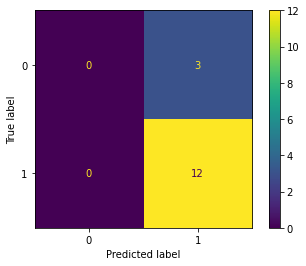

In [69]:
y_pred_test = rf_random7.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test, labels=rf_random7.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random7.classes_)
disp.plot()
plt.show()

In [70]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df_reduced4.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
4,char_rise,0.053739
36,peak_knee_abd,0.044062
5,m_walk_test,0.035654
35,peak_knee_add,0.033783
18,peak_hip_flex,0.030914
6,stair_climbing,0.030169
47,peak_KAM1,0.026222
8,st_hip_abd_norm,0.025525
37,peak_knee_int_rot,0.023817
51,peal_int_rot_mom,0.023404


In [71]:
#drop cartilage relaxation times
df_reduced5 = df_reduced2.drop(['t1rho_mean_fem_whole_cartilage', 't1rho_mean_ace_whole_cartilage',
       't2_mean_fem_whole_cartilage', 't2_mean_ace_whole_cartilage'], axis=1)

In [72]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df_reduced5, kl_score_binary, 
                                                                            test_size = 0.25, random_state = 42, stratify = kl_score_binary)

In [73]:
rf = ExtraTreesClassifier() 
rf_random8 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='accuracy', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)
rf_random8.fit(train_features, train_labels);
rf_random8.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   3.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_esti

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [74]:
#evaluate accuracy of base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels)

0.8

In [75]:
#evaluation accuracy of best model from random grid search
best_random = rf_random8.best_estimator_
rf_random8.score(test_features, test_labels)

0.8

In [76]:
y_pred_test = rf_random8.predict(test_features)
print(classification_report(test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuff/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


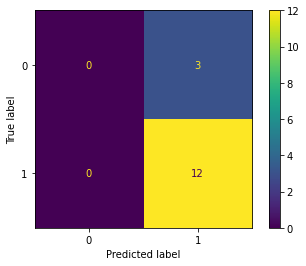


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.3s

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_de

In [77]:
y_pred_test = rf_random8.predict(test_features)
cm = confusion_matrix(test_labels, y_pred_test, labels=rf_random8.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random8.classes_)
disp.plot()
plt.show()

In [76]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df_reduced5.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
0,age,0.110371
24,Coronal_ASL_AcetabulumSuperiorLateral_Baseline...,0.073286
5,char_rise,0.041772
45,peak_knee_abd,0.040532
16,shoamri_car_score,0.038554
44,peak_knee_add,0.029631
27,peak_hip_flex,0.028516
46,peak_knee_int_rot,0.027759
6,m_walk_test,0.025467
56,peak_KAM1,0.022216
